In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
# imported libraries

# Why our research is relevant
---
There is always the debate in diet of meats versus vegetables, and we want to find out if they really are mutually exclusive. We also want to analyse the trends in meat and vegetable consumption over the years, and how they play off of each other.

# Preliminary Cleanup
---

In [59]:
# This is what i used to merge the datasets, not rlly needed anymore but here it is for reference
import pandas as pd

# Load datasets
meat_df = pd.read_csv("datasets/asia_europe_meat_consumption.csv")
fruit_df = pd.read_csv("datasets/fruit-consumption-per-capita.csv")
caloric_df = pd.read_csv("datasets/daily-per-capita-caloric-supply.csv")
urban_df = pd.read_csv("datasets/share-of-population-urban.csv")
gdp_per_cap_df = pd.read_csv("datasets/gdp-per-capita-worldbank.csv")

# Rename columns for clarity
fruit_df = fruit_df.rename(columns={
    "Fruit | 00002919 || Food available for consumption | 0645pc || kilograms per year per capita": "Fruit_kg_per_capita"
})
caloric_df = caloric_df.rename(columns={
    "Daily calorie supply per person": "Daily_caloric_supply"
})
urban_df = urban_df.rename(columns={
    "Urban population (% of total population)": "Urban_population_pct"
})
gdp_per_cap_df = gdp_per_cap_df.rename(columns={
    "GDP per capita, PPP (constant 2021 international $)": "GDP_per_capita"
})

# Merge datasets on Entity, Code, and Year
merged_df = meat_df.merge(
    fruit_df[["Entity", "Code", "Year", "Fruit_kg_per_capita"]],
    on=["Entity", "Code", "Year"],
    how="inner"
).merge(
    caloric_df[["Entity", "Code", "Year", "Daily_caloric_supply"]],
    on=["Entity", "Code", "Year"],
    how="left"  # Using left join as caloric data might not exist for all countries
).merge(
    urban_df[["Entity", "Code", "Year", "Urban_population_pct"]],
    on=["Entity", "Code", "Year"],
    how="left"  # Using left join as urban data might not exist for all countries
).merge(
    gdp_per_cap_df[["Entity", "Code", "Year", "GDP_per_capita"]],
    on=["Entity", "Code", "Year"],
    how="left"  # Using left join as GDP data might not exist for all countries
)

# Check for missing values
print("Missing values in merged dataset:")
print(merged_df.isnull().sum())

# Save the merged dataset
merged_df.to_csv("datasets/merged_meat_fruit_veg_caloric_urban.csv", index=False)

# Display the first few rows of the merged dataset
print("\nFirst 5 rows of merged dataset:")
print(merged_df.head())

Missing values in merged dataset:
Entity                                                                                                           0
Code                                                                                                             0
Year                                                                                                             0
region                                                                                                           0
Total_Meat_kg_per_capita                                                                                         0
Meat, poultry | 00002734 || Food available for consumption | 0645pc || kilograms per year per capita             0
Meat, beef and buffalo | 00002731 || Food available for consumption | 0645pc || kilograms per year per capita    0
Meat, sheep and goat | 00002732 || Food available for consumption | 0645pc || kilograms per year per capita      0
Meat, pig | 00002733 || Food available for con

# Exploratory Data Analysis
---

In [64]:
#This is the refactored code for Tuns eda, it uses merged_meat_fruit_veg.csv
# LOAAAAAAAAAADDDDDDDDDDDDDDDDD
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Filter data for twozerotwotwo
merged_2022 = merged_df[merged_df['Year'] == 2022]

# seperate data by region
europe_data = merged_2022[merged_2022['region'] == 'Europe']
asia_data = merged_2022[merged_2022['region'] == 'Asia']

# Write out some summary statistics
# --- CONFIG ---
VARS = {
    "Total_Meat_kg_per_capita": "Meat (kg/capita)",
    "Vegetables_kg_per_capita": "Vegetables (kg/capita)",
}
REGIONS = ["Asia", "Europe"]
DECIMALS = 2

def fmt(x):
    return ("{:." + str(DECIMALS) + "f}").format(x)

def region_block(df, region, vars_map):
    d = df[df["region"] == region]
    lines = [region, "-" * len(region)]
    for col, label in vars_map.items():
        s = d[col].dropna()
        if s.empty:
            continue
        mean   = s.mean()
        median = s.median()
        std    = s.std()
        q1     = s.quantile(0.25)
        q3     = s.quantile(0.75)
        iqr    = q3 - q1
        mn, mx = s.min(), s.max()
        cv     = (std / mean * 100) if mean != 0 else np.nan

        lines += [
            label,
            f"Count : {s.size}",
            f"Mean : {fmt(mean)}",
            f"Median : {fmt(median)}",
            f"Std : {fmt(std)}",
            f"CV% : {fmt(cv)}",
            f"Q1 : {fmt(q1)}",
            f"Q3 : {fmt(q3)}",
            f"IQR : {fmt(iqr)}",
            f"Min : {fmt(mn)}",
            f"Max : {fmt(mx)}",
            ""  # blank line between variables
        ]
    return "\n".join(lines)

# Filter to 2022 (as you already did)
# merged_2022 = merged_df[merged_df['Year'] == 2022]

# Print blocks
for r in REGIONS:
    print(region_block(merged_2022, r, VARS))
    print()  # extra space between regions

Asia
----
Meat (kg/capita)
Count : 46
Mean : 47.52
Median : 39.30
Std : 32.19
CV% : 67.73
Q1 : 20.28
Q3 : 68.93
IQR : 48.65
Min : 4.40
Max : 132.26

Vegetables (kg/capita)
Count : 46
Mean : 138.17
Median : 128.76
Std : 82.47
CV% : 59.68
Q1 : 75.64
Q3 : 192.55
IQR : 116.91
Min : 23.18
Max : 408.04


Europe
------
Meat (kg/capita)
Count : 39
Mean : 73.80
Median : 72.85
Std : 15.37
CV% : 20.83
Q1 : 65.30
Q3 : 82.87
IQR : 17.58
Min : 35.43
Max : 104.16

Vegetables (kg/capita)
Count : 39
Mean : 165.39
Median : 159.19
Std : 67.98
CV% : 41.10
Q1 : 114.77
Q3 : 183.69
IQR : 68.92
Min : 78.47
Max : 379.14




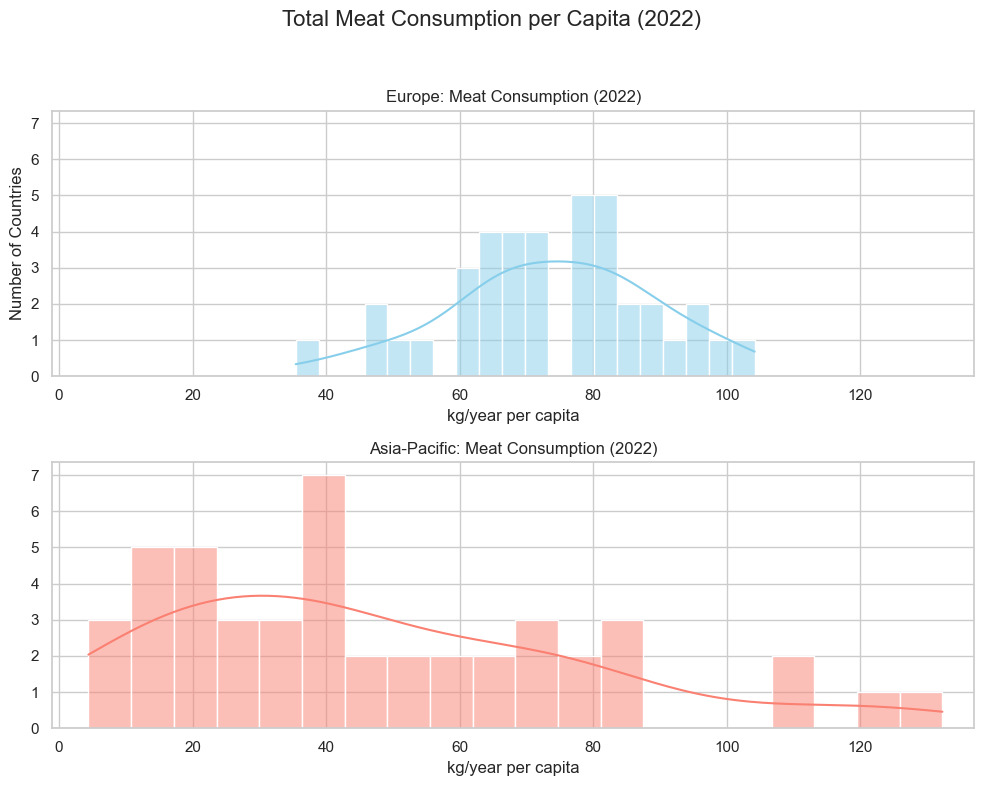

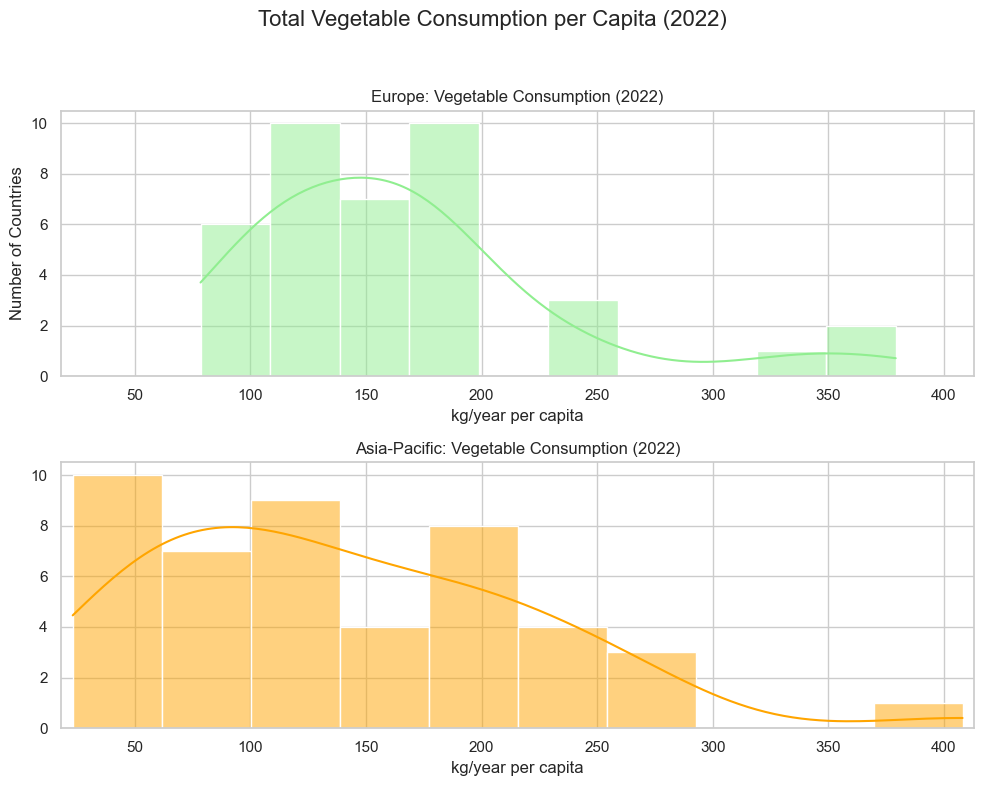

In [62]:
#  Meat Consumption Histogram  #
# Get combined min and max for x-axis
min_x_meat = min(europe_data['Total_Meat_kg_per_capita'].min(), asia_data['Total_Meat_kg_per_capita'].min())
max_x_meat = max(europe_data['Total_Meat_kg_per_capita'].max(), asia_data['Total_Meat_kg_per_capita'].max())
xlim_meat = (int(min_x_meat) - 5, int(max_x_meat) + 5)

# Set up subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

# Europe histogram
sns.histplot(europe_data['Total_Meat_kg_per_capita'], color='skyblue', kde=True, bins=20, ax=axs[0])
axs[0].set_title('Europe: Meat Consumption (2022)')
axs[0].set_xlabel('kg/year per capita')
axs[0].set_ylabel('Number of Countries')
axs[0].set_xlim(xlim_meat)
axs[0].grid(True)

# Asia-Pacific histogram
sns.histplot(asia_data['Total_Meat_kg_per_capita'], color='salmon', kde=True, bins=20, ax=axs[1])
axs[1].set_title('Asia-Pacific: Meat Consumption (2022)')
axs[1].set_xlabel('kg/year per capita')
axs[1].set_ylabel('')
axs[1].set_xlim(xlim_meat)
axs[1].grid(True)

fig.suptitle('Total Meat Consumption per Capita (2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Vegetable Consumption Histogram  #
# Get combined min and max for x-axis
min_x_veg = min(europe_data['Vegetables_kg_per_capita'].min(), asia_data['Vegetables_kg_per_capita'].min())
max_x_veg = max(europe_data['Vegetables_kg_per_capita'].max(), asia_data['Vegetables_kg_per_capita'].max())
xlim_veg = (int(min_x_veg) - 5, int(max_x_veg) + 5)

# Set up side-by-side plots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

# Europe histogram
sns.histplot(europe_data['Vegetables_kg_per_capita'], color='lightgreen', kde=True, bins=10, ax=axs[0])
axs[0].set_title('Europe: Vegetable Consumption (2022)')
axs[0].set_xlabel('kg/year per capita')
axs[0].set_ylabel('Number of Countries')
axs[0].set_xlim(xlim_veg)
axs[0].grid(True)

# Asia-Pacific histogram
sns.histplot(asia_data['Vegetables_kg_per_capita'], color='orange', kde=True, bins=10, ax=axs[1])
axs[1].set_title('Asia-Pacific: Vegetable Consumption (2022)')
axs[1].set_xlabel('kg/year per capita')
axs[1].set_ylabel('')
axs[1].set_xlim(xlim_veg)
axs[1].grid(True)


fig.suptitle('Total Vegetable Consumption per Capita (2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

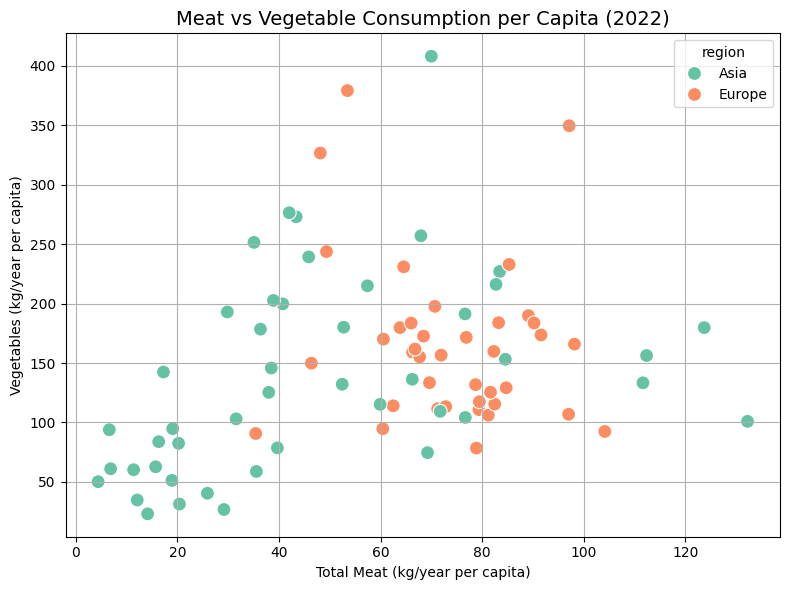

In [6]:
# Load the dataset
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Filter for 2022 data
merged_2022 = merged_df[merged_df['Year'] == 2022]

# Create scatterplot with regression line
plt.figure(figsize=(8, 6))

# Overlay points with color by region
sns.scatterplot(
    data=merged_2022,
    x='Total_Meat_kg_per_capita',
    y='Vegetables_kg_per_capita',
    hue='region',
    palette='Set2',
    s=100,
    legend=True
)

plt.title('Meat vs Vegetable Consumption per Capita (2022)', fontsize=14)
plt.xlabel('Total Meat (kg/year per capita)')
plt.ylabel('Vegetables (kg/year per capita)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\takoo\AppData\Local\Temp\ipykernel_11120\459705022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\takoo\AppData\Local\Temp\ipykernel_11120\459705022.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


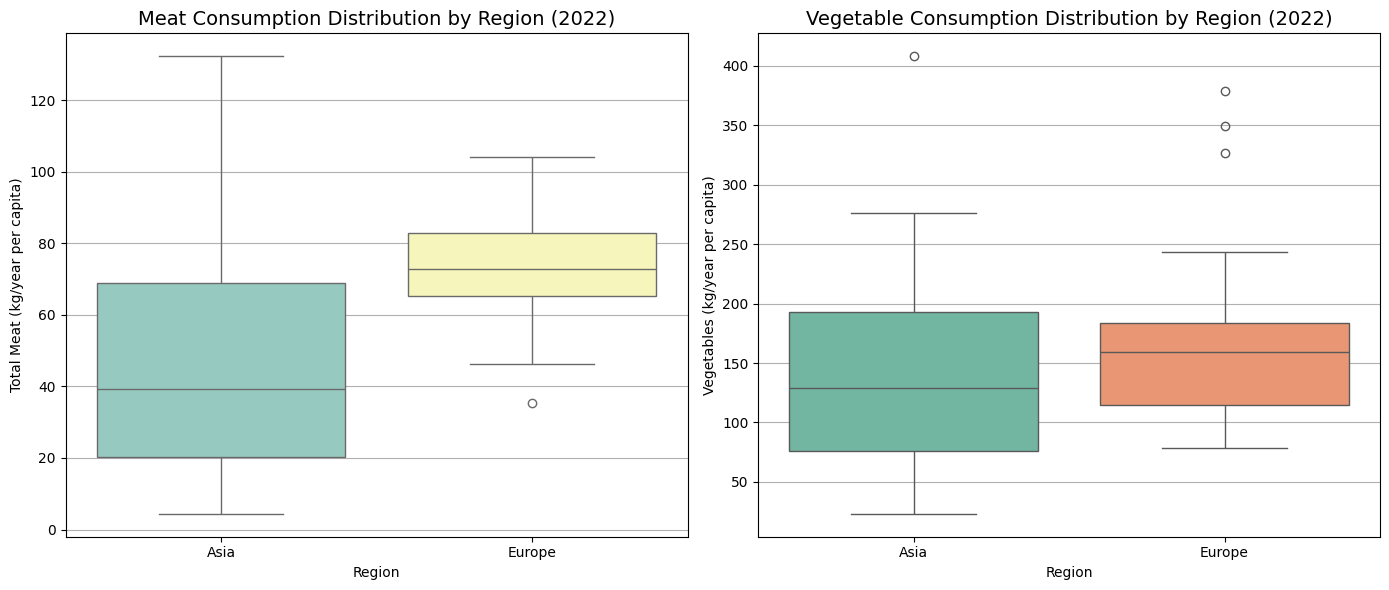

In [7]:
# Load dataset
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Set figure size for two plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Box plot for Meat consumption
sns.boxplot(
    data=merged_2022,
    x='region',
    y='Total_Meat_kg_per_capita',
    palette='Set3',
    ax=axs[0]
)
axs[0].set_title('Meat Consumption Distribution by Region (2022)', fontsize=14)
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Total Meat (kg/year per capita)')
axs[0].grid(True, axis='y')

# Box plot for Vegetable consumption
sns.boxplot(
    data=merged_2022,
    x='region',
    y='Vegetables_kg_per_capita',
    palette='Set2',
    ax=axs[1]
)
axs[1].set_title('Vegetable Consumption Distribution by Region (2022)', fontsize=14)
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Vegetables (kg/year per capita)')
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

# Hypothesis Testing through Permutation - Meat Consumption
---
From the EDA, we can see that Europeans seem to eat more meat than Asians, at least on average. Let us test if that is true. We will take the null hypothesis as "Europeans and Asians' meat consumptions per capita are distributed the same", with the alternative hypothesis being that they are not distributed the same.

Mean meat consumption per capita in Europe is : 73.8 kg/capita/year
Mean meat consumption per capita in Asia is : 47.52 kg/capita/year
Difference of mean meat consumption between EU and Asia is : 26.28
95% of differences of means sampled lie between -12.26 and 12.62
One-sided p-value (EU > Asia): 0.0000
Two-sided p-value:             0.0001


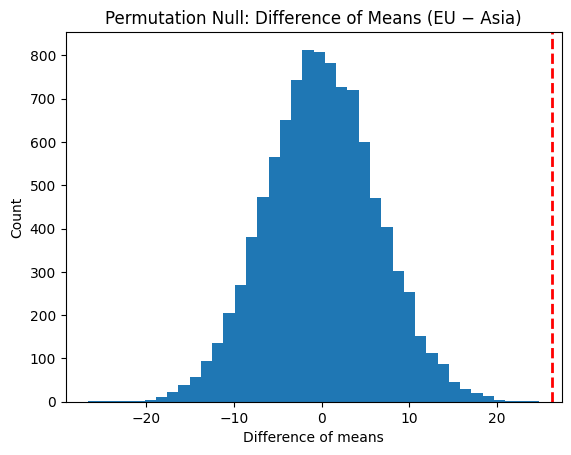

In [8]:
# Let's do hypothesis testing to see if European countries really do eat more meat!
# The way this will work is that for each country there is a meat consumed per capita value.

# Function to find diff of means as this will be important
def diff_of_means(data1, data2) :
    return np.mean(data1) - np.mean(data2)

eu_meat = europe_data['Total_Meat_kg_per_capita']
ap_meat = asia_data['Total_Meat_kg_per_capita']

# We first find the mean meat consumption for the EU and AP.
# Then, we find the observed difference in means.
eu_mean_meat = np.mean(eu_meat)
ap_mean_meat = np.mean(ap_meat)
print(f"Mean meat consumption per capita in Europe is : {np.round(eu_mean_meat, 2)} kg/capita/year")
print(f"Mean meat consumption per capita in Asia is : {np.round(ap_mean_meat, 2)} kg/capita/year")
obsvd_diff_of_means = diff_of_means(eu_meat, ap_meat)
print(f"Difference of mean meat consumption between EU and Asia is : {abs(np.round(obsvd_diff_of_means, 2))}")

# Now, let's do some bootstrap resampling.
# Concatenate the two arrays of EU meat consumption and AP meat consumption.
# Initialise an array to store the differences in means
concat_meat = np.concatenate((eu_meat, ap_meat))
meandiffs = []
samples = 10000

# Repeat the following 10k times:
# Shuffle the new array, then label the first X as "EU" and the rest as "AP"
# Find means for each, and find the difference.
# Append the difference to the diff of means array
for i in range(samples) :
    np.random.shuffle(concat_meat)
    shuffle_EU = concat_meat[:len(eu_meat)]
    shuffle_AP = concat_meat[len(eu_meat):]
    
    shuffle_diff_of_means = diff_of_means(shuffle_EU, shuffle_AP)
    meandiffs.append(shuffle_diff_of_means)

# Now, we should have 10k diff's of means
# Find 95% CI for the diff of means
conf_int_means = np.percentile(meandiffs, (2.5, 97.5))
print(f"95% of differences of means sampled lie between {conf_int_means[0]:.2f} and {conf_int_means[1]:.2f}")
# Draw histogram of diff of means, and show the observed as a vertical line

# p-values
# One-sided (EU > Asia): proportion of null diffs >= observed
p_val_one_sided = np.mean(meandiffs >= obsvd_diff_of_means)
# Two-sided: extremeness by absolute value
p_val_two_sided = np.mean(np.abs(meandiffs) >= abs(obsvd_diff_of_means))

print(f"One-sided p-value (EU > Asia): {p_val_one_sided:.4f}")
print(f"Two-sided p-value:             {p_val_two_sided:.4f}")

# Plot null distribution with observed diff
plt.figure()
plt.hist(meandiffs, bins=40)
plt.axvline(obsvd_diff_of_means, linestyle='--', linewidth=2, color='red')
plt.title("Permutation Null: Difference of Means (EU − Asia)")
plt.xlabel("Difference of means")
plt.ylabel("Count")
plt.show()


## Analysis
---
As can be seen, the observed difference in means between the mean meat consumption and Europe and that of Asia is far outside of the 95% confidence interval, with a p-value of 0.0001 or less. This shows that there is a definite difference between the distribution of meat consumption per capita in Europe and Asia, and that this is not a product of random chance. 

# Bootstrap Resampling and Hypothesis Testing 2
---
We can also see from the EDA that Europeans have slightly more vegetable consumption than Asians as well. This could be a sign that they also eat more vegetables, but could also be a product of random chance. We will first use bootstrap replicates to see the distribution of mean vegetable consumption for both regions.

In [9]:
# Helper function to generate a bootstrap sample
# This should take an array-like data and take a bootstrap sample,
# then take some sort of statistical measurment from it

def bootstrap_replicate_1d(data, func) :
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# ------------------------------------- x ------------------------------------ #

# Helper function to draw samples amount of bootstrap mean replicates from the data
# Should take the data and the number of samples to take
# Function is mentioned here as the mean

def draw_bootstrap_means(data, samples = 1) :
    means = np.zeros(samples)
    
    for i in range(samples) :
        means[i] = bootstrap_replicate_1d(data, np.mean)
        
    return means

95% of mean European vegetable consumptions per capita sampled lie between 145.53 and 188.26 kg/capita/year
95% of mean Asian vegetable consumptions per capita sampled lie between 115.17 and 162.15 kg/capita/year


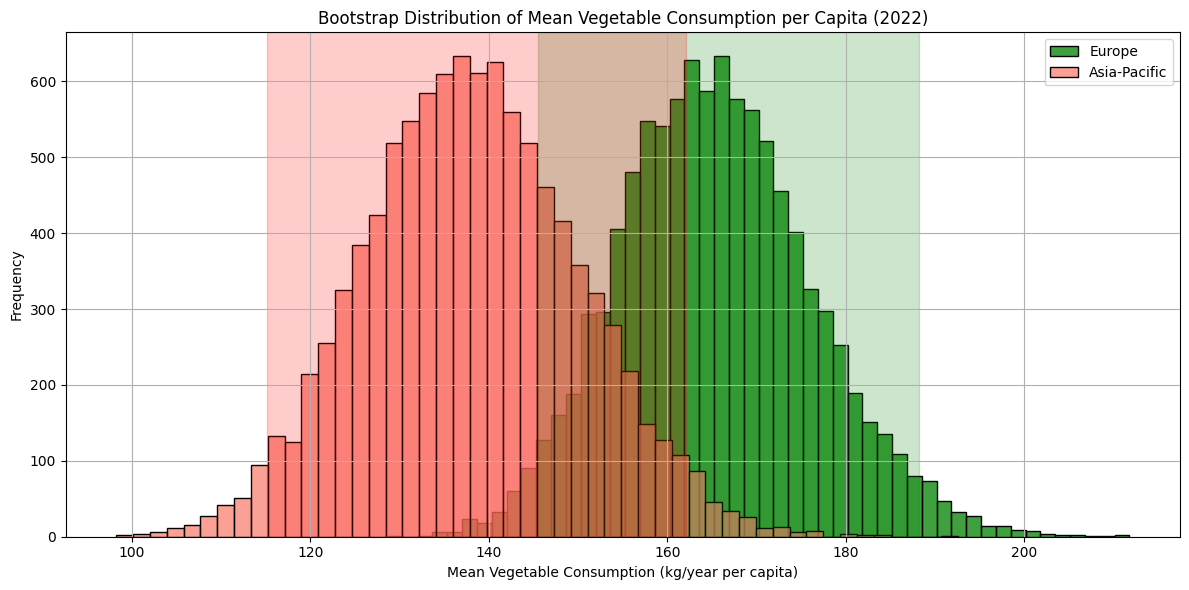

In [10]:
# -------- Bootstrap Replicate Analysis of mean vegetable consumption -------- #

# This code should generate a list of 10k bootstrap replicate means for eu_veg and ap_veg
# Then, generate a 95% confint for each
# Followed by a nice histogram that shows the two means in the same plot along with darker highlighting for the 95%'s

eu_veg = europe_data['Vegetables_kg_per_capita']
ap_veg = asia_data['Vegetables_kg_per_capita']

# Generate BS means
eu_bs_means = draw_bootstrap_means(eu_veg, 10000)
ap_bs_means = draw_bootstrap_means(ap_veg, 10000)

# Calculate confidence intervals
conf_int_means_eu = np.percentile(eu_bs_means, (2.5, 97.5))
conf_int_means_ap = np.percentile(ap_bs_means, (2.5, 97.5))
print(f"95% of mean European vegetable consumptions per capita sampled lie between {conf_int_means_eu[0]:.2f} and {conf_int_means_eu[1]:.2f} kg/capita/year")
print(f"95% of mean Asian vegetable consumptions per capita sampled lie between {conf_int_means_ap[0]:.2f} and {conf_int_means_ap[1]:.2f} kg/capita/year")

# Draw two histograms of the means
# Europe as blue, Asia as salmon
# On the same set of axes
# 95% conf innt should be highlighted somehow

# Plot histograms
plt.figure(figsize=(12, 6))

sns.histplot(eu_bs_means, bins=50, color='green', label='Europe')
sns.histplot(ap_bs_means, bins=50, color='salmon', label='Asia-Pacific')

# Shade confidence intervals
plt.axvspan(conf_int_means_eu[0], conf_int_means_eu[1], color='green', alpha=0.2)
plt.axvspan(conf_int_means_ap[0], conf_int_means_ap[1], color='red', alpha=0.2)

# Labels and legend
plt.title('Bootstrap Distribution of Mean Vegetable Consumption per Capita (2022)')
plt.xlabel('Mean Vegetable Consumption (kg/year per capita)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis
---
As we can see, the distributions of mean vegetable consumption in Europe and Asia are somewhat close together - though there is a favoring towards Europe - so further testing will be required to discern if the difference is statsitcally significant.

Mean vegetable consumption per capita in Europe is : 165.39 kg/capita/year
Mean vegetable consumption per capita in Asia is : 138.17 kg/capita/year
Difference of mean vegetable consumption between EU and Asia is : 27.21
95% of differences of means sampled lie between -32.11 and 32.94
One-sided p-value (EU > Asia): 0.0535
Two-sided p-value:             0.1038


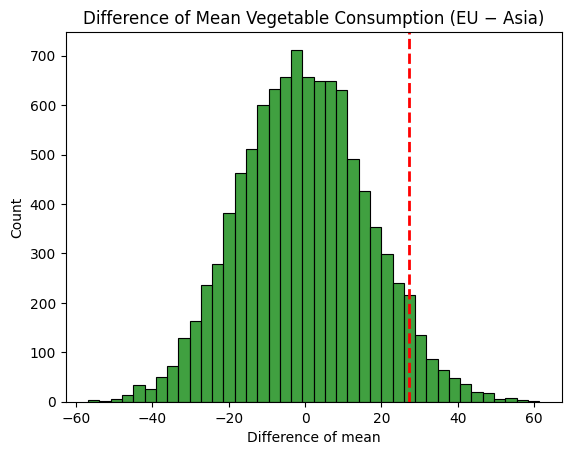

In [11]:
# --------- Hypothesis testing on Europe v Asia Vegetable consumption -------- #

# Null hypo: Europe and Asia's vegetable consumptions are distributed the same
# Alt hypo: They aren't

# We first find the mean vegetable consumption for the EU and AP.
# Then, we find the observed difference in means.
eu_mean_veg = np.mean(eu_veg)
ap_mean_veg = np.mean(ap_veg)
print(f"Mean vegetable consumption per capita in Europe is : {eu_mean_veg:.2f} kg/capita/year")
print(f"Mean vegetable consumption per capita in Asia is : {ap_mean_veg:.2f} kg/capita/year")
obsvd_diff_of_means = diff_of_means(eu_veg, ap_veg)
print(f"Difference of mean vegetable consumption between EU and Asia is : {abs(obsvd_diff_of_means):.2f}")

# ------------------------------------- x ------------------------------------ #

# Now, let's do some bootstrap resampling.
# Concatenate the two arrays of EU vegetable consumption and AP vegetable consumption.
# Initialise an array to store the differences in means
concat_veg = np.concatenate((eu_veg, ap_veg))
meandiffs = []
samples = 10000

# Repeat the following 10k times:
# Shuffle the new array, then label the first X as "EU" and the rest as "AP"
# Find means for each, and find the difference.
# Append the difference to the diff of means array
for i in range(samples) :
    np.random.shuffle(concat_veg)
    shuffle_EU = concat_veg[:len(eu_veg)]
    shuffle_AP = concat_veg[len(eu_veg):]
    
    shuffle_diff_of_means = diff_of_means(shuffle_EU, shuffle_AP)
    meandiffs.append(shuffle_diff_of_means)

# Now, we should have 10k diff's of means
# Find 95% CI for the diff of means
conf_int_means = np.percentile(meandiffs, (2.5, 97.5))
print(f"95% of differences of means sampled lie between {conf_int_means[0]:.2f} and {conf_int_means[1]:.2f}")
# Draw histogram of diff of means, and show the observed as a vertical line

# ------------------------------------- x ------------------------------------ #

# p-values
# One-sided (EU > Asia): proportion of null diffs >= observed
p_val_one_sided = np.mean(meandiffs >= obsvd_diff_of_means)
# Two-sided: extremeness by absolute value
p_val_two_sided = np.mean(np.abs(meandiffs) >= abs(obsvd_diff_of_means))

print(f"One-sided p-value (EU > Asia): {p_val_one_sided:.4f}")
print(f"Two-sided p-value:             {p_val_two_sided:.4f}")

# ------------------------------------- x ------------------------------------ #

# Plot null distribution with observed diff
plt.figure()
sns.histplot(meandiffs, bins=40, color='green',)
plt.axvline(obsvd_diff_of_means, linestyle='--', linewidth=2, color='red')
plt.title("Difference of Mean Vegetable Consumption (EU − Asia)")
plt.xlabel("Difference of mean")
plt.ylabel("Count")
plt.show()


## Analysis
---
With an observed difference in means of 27.21, we can see that the difference lies just within the 95% confidence interval of diffrence of means obtained through permutation sampling. The hypothesis test also reveals a one-tailed p-value of 0.0556 - 5.56%. While this is a rather small value, it is not as statistically significant as the advantage Europe has over Asia in per-capita meat consumption. However, we can conclude that Europe eats more meat than Asia on average, and somewhat more vegetables. The next step would be to discern the reasons behind this difference. What factors affect meat and vegetable consumption in these two regions?

# Linear Regression 1 - Meat
---
In this section, we will attempt to discern the relationship between meat/vegetable consumption in Europe and Asia versus various factors such as temperature, urbanisation and GDP per capita. Through this, we may shed light on what factors drive diet and consumption habits, and derive possible recommendations for a more balanced consumption.

In [14]:
# Import necessary libraries
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from adjustText import adjust_text  # For preventing label overlap

## Meat Consumption and GDP Per Capita
---
Richer countries tend to be able to afford more meat to eat, so there should be a positive correlation between meat consumption per capita and GDP per capita. For Europe and Asia, let's build a model of GDP per capita on the Y axis and Meat consumption per capita on the Y axis.

- We will start by drawing a scatter plot of Meat consumption against GDP
- We will then create a model based on training data
- We will then test the model on the rest of the data, which will be the test data.
- Error values will be analysed and the goodness of fit will be determined through bootstrap resampling and permutation hypothesis testing

### Making the Scatter Plot

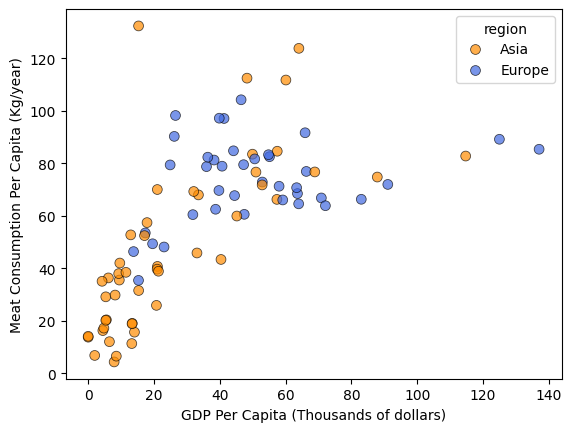

In [15]:
# Make scatter plot

# Take Europe and Asia Dataset
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Make GDP in thousands of dollars to avoid insane model params later on
merged_df['GDP_per_capita'] /= 1000

# Create scatterplot of GDP to meat consumption
_ = sns.scatterplot(
    data=merged_df,
    x='GDP_per_capita',
    y='Total_Meat_kg_per_capita',
    hue='region',
    palette={'Europe': 'royalblue', 'Asia': 'darkorange'},
    s=50, alpha=0.7, edgecolor='k'
)
_ = plt.xlabel('GDP Per Capita (Thousands of dollars)')
_ = plt.ylabel('Meat Consumption Per Capita (Kg/year)')
plt.show()
# Color EU and AP for comparison only

### Scatterplot Analysis
---
We can see from the scatter plot that there is some positive correlation between GDP per capita and Meat Consumpption per capita, barring a few outliers of extremely wealthy European and Asian countries. We can quantify this relationship through a linear model, which we wil now make.

### Creating training data and making model

In [16]:
# Create model based on training data

# 40% of data used to fit model
# Random state for reproducibility
df_train, df_test = train_test_split(merged_df, test_size=0.4, random_state=111)
meat_model = ols(formula="Total_Meat_kg_per_capita ~ GDP_per_capita", data=df_train).fit()
print(meat_model.params)

# Test model on rest of the data
y_pred = meat_model.predict(df_test)

residuals = df_test['Total_Meat_kg_per_capita'] - y_pred

RSS = np.sum(np.square(residuals))
TSS = np.sum(np.square(df_test['Total_Meat_kg_per_capita']-np.mean(df_test['Total_Meat_kg_per_capita'])))

rsquare = 1 - RSS/TSS
print(f"R^2 = {rsquare:.4f}")

rmse = np.sqrt(RSS/len(df_test))
print(f"RMSE = {rmse:.4f}")

Intercept         33.889778
GDP_per_capita     0.802201
dtype: float64
R^2 = 0.2563
RMSE = 23.2386


### Model Analysis
---

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


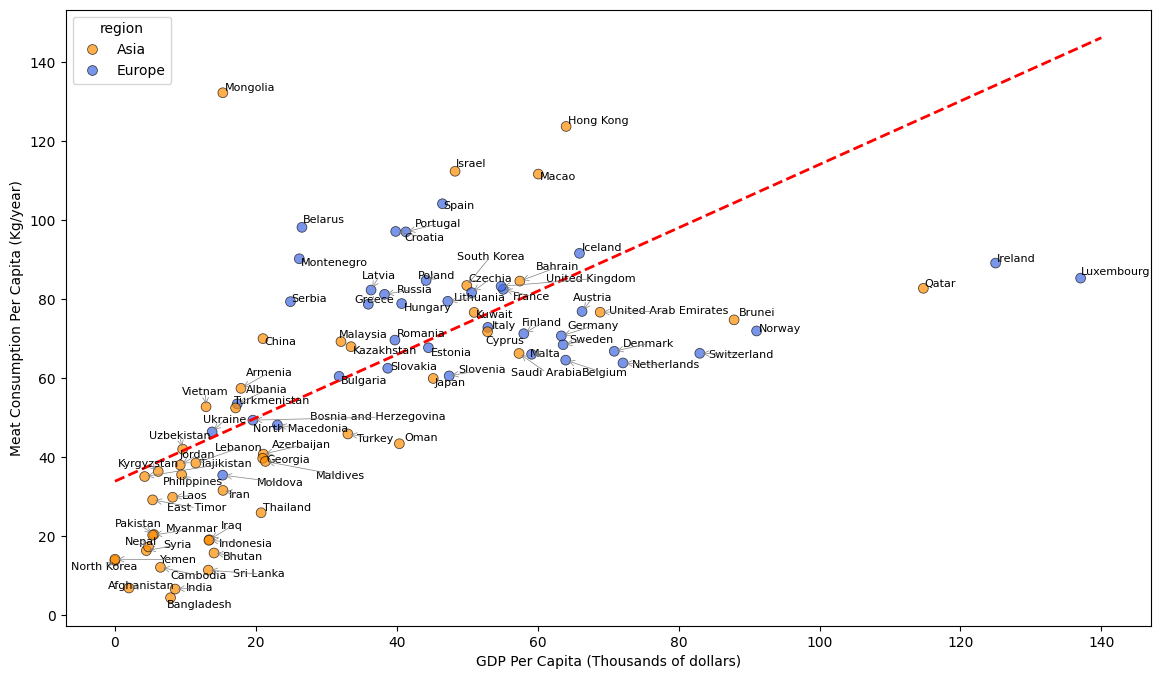

In [17]:
#Draw the graph
# Create scatterplot of GDP to meat consumption
plt.figure(figsize=(14, 8))

_ = sns.scatterplot(
    data=merged_df,
    x='GDP_per_capita',
    y='Total_Meat_kg_per_capita',
    hue='region',
    palette={'Europe': 'royalblue', 'Asia': 'darkorange'},
    s=50, alpha=0.7, edgecolor='k'
)

x_values = pd.DataFrame({'GDP_per_capita': [0, 140]})  # GDP range from 0 to 140k
y_pred = meat_model.predict(x_values)

_ = plt.plot(x_values, y_pred, color='red', linewidth=2, linestyle='--', label=f'Regression Line (R²={meat_model.rsquared:.2f})')

# Create list for all labels
texts = []
for _, row in merged_df.iterrows():
    texts.append(plt.text(row['GDP_per_capita'], 
                        row['Total_Meat_kg_per_capita'], 
                        row['Entity'],
                        fontsize=8))
    
# Adjust text to prevent overlap
adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_points=(1.2, 1.2))

_ = plt.xlabel('GDP Per Capita (Thousands of dollars)')
_ = plt.ylabel('Meat Consumption Per Capita (Kg/year)')

We can see some outliers affecting the model. There are a few high GDP per capita nations in both Europe and Asia that do not consume a lot of meat. Apart from these outliers, the relationship holds true. For reference, we will create a new model without these outliers. The outliers are:

- Switzerland
- Ireland
- Brunei
- Qatar
- Luxembourg
- Mongolia
- Norway

We will create a dataframe without these countries to determine a more accurate relationship.

In [18]:
# In merged_df, remove the countries listed in the above markdown,

merged_df_no_outliers = merged_df[~merged_df['Entity'].isin(['Switzerland', 'Ireland', 'Brunei', 'Qatar', 'Luxembourg', 'Mongolia', 'Norway'])]

# Create model based on training data

# 40% of data used to fit model
# Random state for reproducibility
df_train, df_test = train_test_split(merged_df_no_outliers, test_size=0.4, random_state=111)
meat_model_2 = ols(formula="Total_Meat_kg_per_capita ~ GDP_per_capita", data=df_train).fit()
print(meat_model_2.params)

# Test model on rest of the data
y_pred = meat_model_2.predict(df_test)

residuals = df_test['Total_Meat_kg_per_capita'] - y_pred

RSS = np.sum(np.square(residuals))
TSS = np.sum(np.square(df_test['Total_Meat_kg_per_capita']-np.mean(df_test['Total_Meat_kg_per_capita'])))

rsquare = 1 - RSS/TSS
print(f"R^2 = {rsquare:.4f}")

rmse = np.sqrt(RSS/len(df_test))
print(f"RMSE = {rmse:.4f}")


Intercept         24.537214
GDP_per_capita     1.049350
dtype: float64
R^2 = 0.5481
RMSE = 21.3043


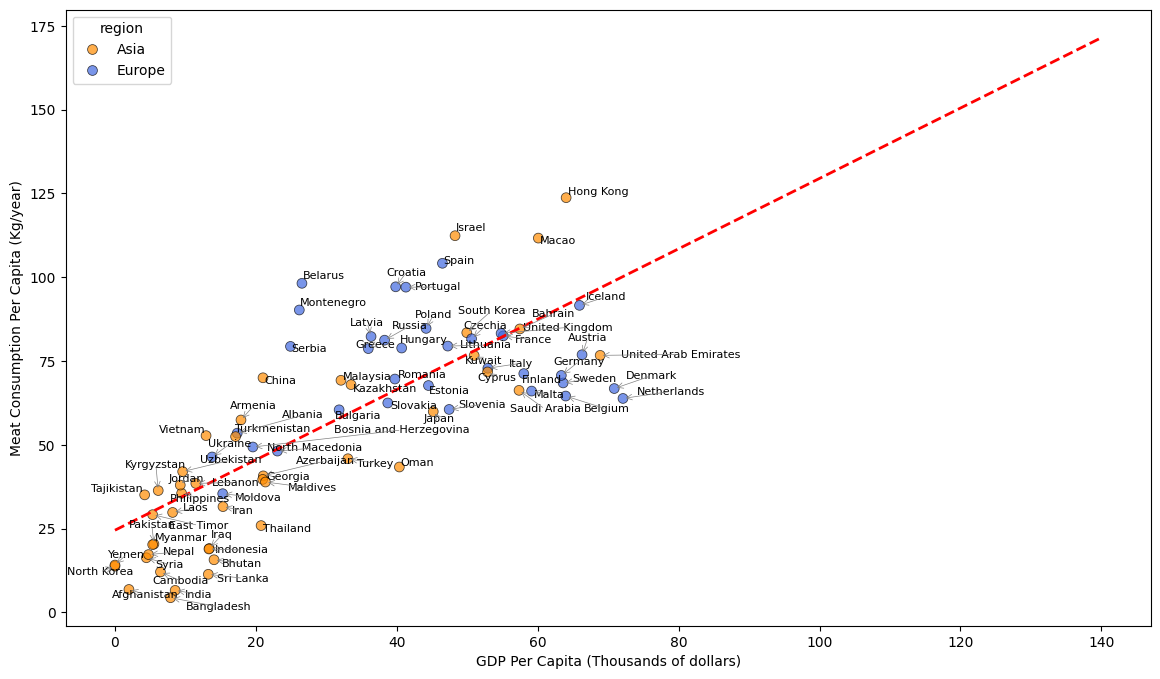

In [19]:
#Draw the graph
# Create scatterplot of GDP to meat consumption
plt.figure(figsize=(14, 8))

_ = sns.scatterplot(
    data=merged_df_no_outliers,
    x='GDP_per_capita',
    y='Total_Meat_kg_per_capita',
    hue='region',
    palette={'Europe': 'royalblue', 'Asia': 'darkorange'},
    s=50, alpha=0.7, edgecolor='k'
)

x_values = pd.DataFrame({'GDP_per_capita': [0, 140]})  # GDP range from 0 to 140k
y_pred = meat_model_2.predict(x_values)

_ = plt.plot(x_values, y_pred, color='red', linewidth=2, linestyle='--', label=f'Regression Line (R²={meat_model_2.rsquared:.2f})')

# Create list for all labels
texts = []
for _, row in merged_df_no_outliers.iterrows():
    texts.append(plt.text(row['GDP_per_capita'], 
                        row['Total_Meat_kg_per_capita'], 
                        row['Entity'],
                        fontsize=8))
    
# Adjust text to prevent overlap
adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_points=(1.2, 1.2))

_ = plt.xlabel('GDP Per Capita (Thousands of dollars)')
_ = plt.ylabel('Meat Consumption Per Capita (Kg/year)')

With an R^2 value of almost 0.6, we can see that there is some positive correlation between GDP per capita and meat consumption when adjusting for countries with exceedingly high GDP per capita values. We will therefore use `meat_model_2` as a predictor for meat consumption based on GDP per capita.

### Test Results Breakdown
---
The remainder of this section is dedicated to determining goodness-of-fit for `meat_model_2`. The two tests performed are:
- Bootstrapping x,y pairs and determining a 95% confidence interval for slope and intercept
- Hypothesis testing using random shuffling to determine whether the correlation is real

Both serve to enhance the credibility of `meat_model_2`.

In [20]:
# Helper function to draw bootstrap x,y pairs
# This should draw n number of pairs where n = len(x)
# This should be repeated samples times

def draw_bs_pairs_linreg(x, y, samples = 1):
    inds = np.arange(len(x))
    slopes = np.zeros(samples)
    intercepts = np.zeros(samples)
    
    for i in range(samples):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds] 
        slopes[i], intercepts[i] = np.polyfit(bs_x, bs_y, 1)
        
    return slopes, intercepts

Slope from OLS = 1.0494
Intercept from OLS = 24.5372
95% Bootstrap confidence interval of slope lies between 0.8564 and 1.2407
95% Bootstrap confidence interval of intercept lies between 17.5734 and 30.4205


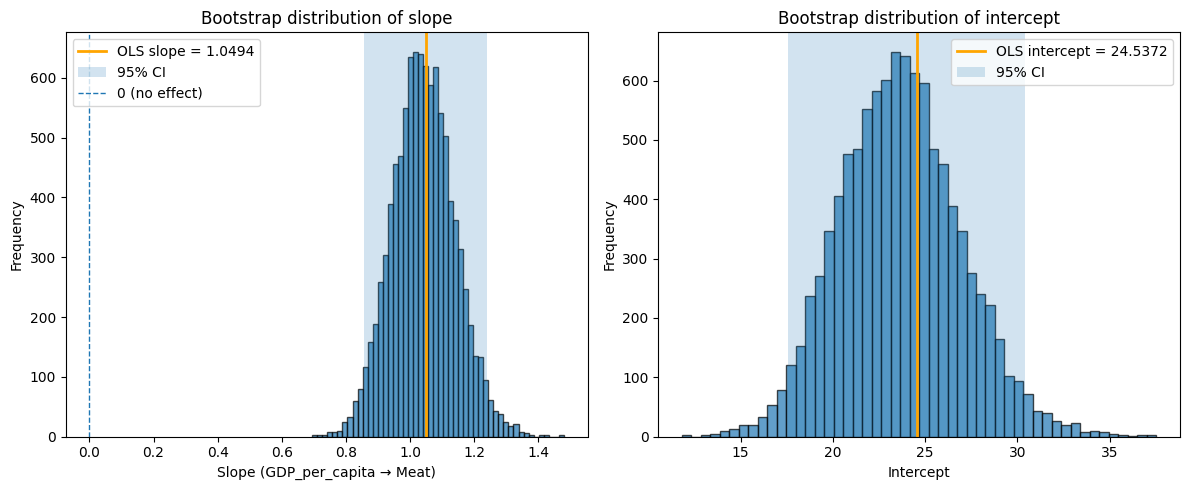

In [21]:
# Goodness of fit 1

# For this, let's figure out whether the slope is random or actually caused by the data
# As a reminder, the slope made by OLS:
print(f"Slope from OLS = {meat_model_2.params['GDP_per_capita']:.4f}")
print(f"Intercept from OLS = {meat_model_2.params['Intercept']:.4f}")

# Now, let's bootstrap 10000 slopes and intercepts and see how the confidence intervals fare
bs_slopes, bs_intercepts = draw_bs_pairs_linreg(merged_df_no_outliers['GDP_per_capita'].to_numpy(), merged_df_no_outliers['Total_Meat_kg_per_capita'].to_numpy(), 10000)

# Find 95% confidence intervals of slopes and intercepts obtained from bootstrap
bs_slopes_confint = np.percentile(bs_slopes, [2.5, 97.5])
bs_intercepts_confint = np.percentile(bs_intercepts, [2.5, 97.5])

# Print out results
print(f"95% Bootstrap confidence interval of slope lies between {bs_slopes_confint[0]:.4f} and {bs_slopes_confint[1]:.4f}")
print(f"95% Bootstrap confidence interval of intercept lies between {bs_intercepts_confint[0]:.4f} and {bs_intercepts_confint[1]:.4f}")

# Draw histograms to plot the distribution of slopes and intercepts and plop down our slope and intercept
# Save ols_slope and ols_intercept first
ols_slope = meat_model_2.params['GDP_per_capita']
ols_intercept = meat_model_2.params['Intercept']

# Histograms with OLS lines and CI bands
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Slope ---
axes[0].hist(bs_slopes, bins=50, alpha=0.7, edgecolor='black')
axes[0].axvline(ols_slope, linewidth=2, label=f'OLS slope = {ols_slope:.4f}', color='orange')
axes[0].axvspan(bs_slopes_confint[0], bs_slopes_confint[1], alpha=0.2, label='95% CI')
axes[0].axvline(0, linestyle='--', linewidth=1, label='0 (no effect)')
axes[0].set_title('Bootstrap distribution of slope')
axes[0].set_xlabel('Slope (GDP_per_capita → Meat)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# --- Intercept ---
axes[1].hist(bs_intercepts, bins=50, alpha=0.7, edgecolor='black')
axes[1].axvline(ols_intercept, linewidth=2, label=f'OLS intercept = {ols_intercept:.4f}', color='orange')
axes[1].axvspan(bs_intercepts_confint[0], bs_intercepts_confint[1], alpha=0.2, label='95% CI')
axes[1].set_title('Bootstrap distribution of intercept')
axes[1].set_xlabel('Intercept')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

In [22]:
# Next - Permutation hypothesis test
# Shuffle data randomly and draw a line of best fit
# Helper function to shuffle data randomly and draw a line of best fit
    
def draw_perm_replicates(x, y, reps=1):
    # Initialise array
    slope_replicates = np.zeros(reps)
    
    # Make reps number of replicate slopes
    for i in range(reps):
        y_perm = np.random.permutation(y)
        slope_replicates[i], _ = np.polyfit(x, y_perm, 1)
        
    return slope_replicates


Slope from OLS = 1.0494

If the data was randomly distributed...
99% Confidence interval of slope lies between -0.3768 and 0.3909

P-value = 0.0


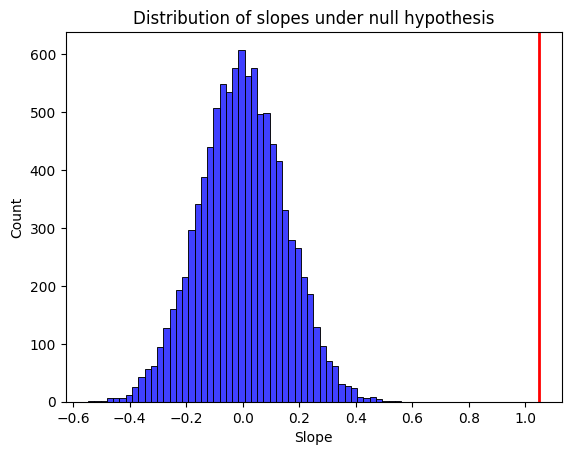

In [23]:
# Do this 10k times to get 10k slopes
# Draw a histogram of 10k slopes and teh 95% Ci
# Use p value to show that our slope blows it out of the water
# Conclusion: statistically significant

# Computed slope through OLS
print(f"Slope from OLS = {meat_model_2.params['GDP_per_capita']:.4f}\n")

# Get 10k slopes from permutation
slope_replicates = draw_perm_replicates(merged_df_no_outliers['GDP_per_capita'].to_numpy(), merged_df_no_outliers['Total_Meat_kg_per_capita'].to_numpy(), 10000)

# Get 99% CI of slope replicates
perm_slopes_confint = np.percentile(slope_replicates, [0.5, 99.5])
print("If the data was randomly distributed...")
print(f"99% Confidence interval of slope lies between {perm_slopes_confint[0]:.4f} and {perm_slopes_confint[1]:.4f}")

# Find P value for the absolute value of the slope being the OLS slope or higher.
ols_slope = meat_model_2.params['GDP_per_capita']

p_val = np.sum(slope_replicates >= ols_slope)/len(slope_replicates)
print(f"\nP-value = {p_val}")

# Plot null distribution with observed slope
plt.figure()
sns.histplot(slope_replicates, bins=50, color='blue')
plt.axvline(ols_slope, linestyle='-', linewidth=2, color='red')
plt.title("Distribution of slopes under null hypothesis")
plt.xlabel("Slope")
plt.ylabel("Count")
plt.show()

### Final Thoughts on Model
---
Final model is Meat consumption = 1.0494 * GDP + 24.5372

# Linear Regression 2 - Vegetables
----
Time to analyse the predictors of vegetable consumption

## Possible regressors
---
- GDP Per capita
- Caloric Intake
- Urbanisation

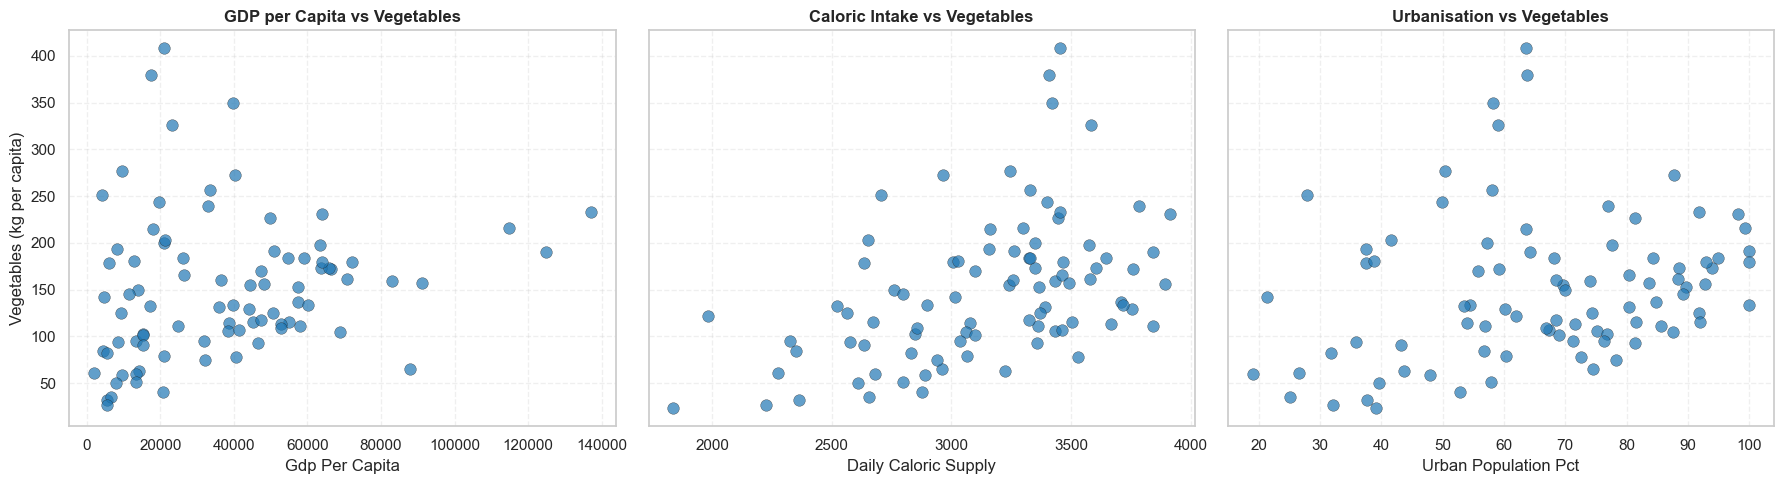

In [24]:
# Draw scatterplots of GDP/Caloric/Urbanisation against veg

merged_df = pd.read_csv("datasets/merged_meat_fruit_veg_caloric_urban.csv")

GDP = merged_df['GDP_per_capita']
veg = merged_df['Vegetables_kg_per_capita']
urbanisation = merged_df['Urban_population_pct']
caloric_intake = merged_df['Daily_caloric_supply']

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

pairs = [
    (GDP,            veg, "GDP per Capita vs Vegetables"),
    (caloric_intake, veg, "Caloric Intake vs Vegetables"),
    (urbanisation,   veg, "Urbanisation vs Vegetables"),
]

for ax, (x, y, title) in zip(axes, pairs):
    sns.scatterplot(
        x=x, y=y,
        s=70, alpha=0.7,
        edgecolor='k', linewidth=0.3,
        color='tab:blue',  # single color
        ax=ax
    )
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel(x.name.replace('_', ' ').title())
    ax.set_ylabel("Vegetables (kg per capita)" if ax is axes[0] else "")
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## Notes
---
We can see that there is a weak positive correlation between the three regressors and vegetable consumption, though it is not as clear as meat consumption. We will try a few models based on these regressors to see which one fits the best.

In [25]:
# Helper function to determine Rsquared and RMSE for test data and training data
# What do we need?
# The model
# The data we are going to use predict on

def calculate_fit_goodness_veg(model, data):
    y_pred = model.predict(data)

    residuals = data['Vegetables_kg_per_capita'] - y_pred

    RSS = np.sum(np.square(residuals))
    TSS = np.sum(np.square(data['Vegetables_kg_per_capita']-np.mean(data['Vegetables_kg_per_capita'])))

    rsquare = 1 - RSS/TSS
    rmse = np.sqrt(RSS/len(data))
    
    return rsquare, rmse

In [58]:
from tabulate import tabulate

# Split dataset into training and testing
df_train, df_test = train_test_split(merged_df, test_size=0.5)

# Create the array of formulae
formulas = {
    "Urbanisation":                 "Vegetables_kg_per_capita ~ Urban_population_pct",
    "GDP":                          "Vegetables_kg_per_capita ~ GDP_per_capita",
    "Caloric intake":               "Vegetables_kg_per_capita ~ Daily_caloric_supply",
    "Urbanisation + GDP":           "Vegetables_kg_per_capita ~ Urban_population_pct + GDP_per_capita",
    "Urbanisation + Caloric":       "Vegetables_kg_per_capita ~ Urban_population_pct + Daily_caloric_supply",
    "GDP + Caloric":                "Vegetables_kg_per_capita ~ GDP_per_capita + Daily_caloric_supply",
    "Urbanisation + GDP + Caloric": "Vegetables_kg_per_capita ~ Urban_population_pct + GDP_per_capita + Daily_caloric_supply",
}

# --- helper: get predictor columns from a simple + formula ---
def predictors_in(formula: str):
    rhs = formula.split("~", 1)[1]
    return [c.strip() for c in rhs.split("+")]

results = []

for name, formula in formulas.items():
    preds = predictors_in(formula)
    needed = ['Vegetables_kg_per_capita'] + preds

    # drop rows with NAs only for the columns this model needs
    train_use = df_train.dropna(subset=needed).copy()
    test_use  = df_test.dropna(subset=needed).copy()

    # fit on TRAIN only
    model = ols(formula, data=train_use).fit()

    # metrics on TRAIN and TEST
    r2_tr, rmse_tr = calculate_fit_goodness_veg(model, train_use)
    r2_te, rmse_te = calculate_fit_goodness_veg(model, test_use)

    results.append({
        "Model": name,
        "Predictors": ", ".join(preds),
        "n_train": len(train_use),
        "n_test": len(test_use),
        "Train_R2": round(r2_tr, 3) if pd.notna(r2_tr) else np.nan,
        "Train_RMSE": round(rmse_tr, 3) if pd.notna(rmse_tr) else np.nan,
        "Test_R2": round(r2_te, 3) if pd.notna(r2_te) else np.nan,
        "Test_RMSE": round(rmse_te, 3) if pd.notna(rmse_te) else np.nan,
    })

# tidy comparison table (sorted by test RMSE ascending)
results_df = pd.DataFrame(results).sort_values(["Test_RMSE", "Train_RMSE"], ascending=[True, True]).reset_index(drop=True)
print(tabulate(results_df, headers='keys', tablefmt='psql'))

+----+------------------------------+------------------------------------------------------------+-----------+----------+------------+--------------+-----------+-------------+
|    | Model                        | Predictors                                                 |   n_train |   n_test |   Train_R2 |   Train_RMSE |   Test_R2 |   Test_RMSE |
|----+------------------------------+------------------------------------------------------------+-----------+----------+------------+--------------+-----------+-------------|
|  0 | Caloric intake               | Daily_caloric_supply                                       |        43 |       44 |      0.152 |       65.748 |     0.228 |      70.642 |
|  1 | Urbanisation + Caloric       | Urban_population_pct, Daily_caloric_supply                 |        43 |       44 |      0.154 |       65.669 |     0.218 |      71.091 |
|  2 | GDP + Caloric                | GDP_per_capita, Daily_caloric_supply                       |        42 |       43 

## Conclusion for Vegetable Consumption Linear Regression
---

When it comes to the training data, Urbanisation + GDP + Caloric intake seems to give the "least worst" error. However, when we go back to the original test data, we find that caloric supply is the best regressor to determine a relationship between itself and vegetable consumption

# Overall Conclusion
---
- Essentially it was quite shit and we only got an answer for meat
- Fluff it up here a little
- MENTION FURTHER RESEARCH STEPS
- Namely, how would we go about finding the actual relationship between vegetable consumption

# Data Sources
---
All data gathered from Our World in Data. Links are below.
- https://ourworldindata.org/grapher/per-capita-meat-type.csv?v=1&csvType=full&useColumnShortNames=true
- https://ourworldindata.org/grapher/daily-per-capita-caloric-supply.csv?v=1&csvType=full&useColumnShortNames=true
- https://ourworldindata.org/grapher/gdp-per-capita-worldbank.csv?v=1&csvType=full&useColumnShortNames=true
- https://ourworldindata.org/grapher/share-of-population-urban.csv?v=1&csvType=full&useColumnShortNames=true
- https://ourworldindata.org/grapher/vegetable-consumption-per-capita.csv?v=1&csvType=full&useColumnShortNames=true